In [91]:
import json
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import math

In [110]:
dir = "p_date=2022-12-02-16_48_38"

In [118]:
path = f'../../output/weights/{dir}/log.json'
#path = "C:/Users/elias/OneDrive/Desktop/log.json"

with open(path, 'r') as f:
    data = json.load(f)

l = len(data["loss"])
print(f"{l} records")
print(data.keys())

3001 records
dict_keys(['loss', 'mean_q', 'episode_reward', 'nb_episode_steps', 'nb_steps', 'episode', 'duration'])


In [119]:
slice = 200000

# Loss
loss = [ v for v in data["loss"] if str(v) != "nan" ][-slice:]
mean_loss = stat.mean(loss) + 100000
loss_filtered = { k: v for k, v in enumerate(loss) if v <= mean_loss }

# Mean Q
mean_q = [ v for v in data["mean_q"] if str(v) != "nan" ]#[-slice:]
mean_mean_q = stat.mean(mean_q)
mean_q_filtered = { k: v for k, v in enumerate(mean_q) }# if v <= mean_mean_q }

# Reward
reward = [ v for v in data["episode_reward"] if str(v) != "nan" ][-slice:]
mean_reward = stat.mean(reward)
episode_reward = { k: v for k, v in enumerate(reward) }# if v <= mean_reward }

# Duration
duration = { k: v for k, v in enumerate(data["duration"]) if str(v) != "nan" }

# NB Episode steps
nb_episode_steps = { k: v for k, v in enumerate(data["nb_episode_steps"][-slice:]) if str(v) != "nan" }

In [120]:
def plot(data, title, labelX, labelY):
    interval = 1000
    interval_min_max = 1_000
    
    
    index_0 = list(data.keys())[0]
    moving_average = { i + index_0 : round(stat.mean(list(data.values())[i:i+interval+1]), 1) for i in range(0, len(data.values()), interval) }
    min_line = { i + index_0 : round(min(list(data.values())[i:i+interval_min_max+1]), 1) for i in range(0, len(data.values()), interval_min_max) }
    max_line = { i + index_0 : round(max(list(data.values())[i:i+interval_min_max+1]), 1) for i in range(0, len(data.values()), interval_min_max) }
    
    plt.figure(figsize=(15,5))
    plt.scatter(data.keys(), data.values())
    
    plt.plot(list(moving_average.keys()), list(moving_average.values()), color="red")
    plt.plot(list(min_line.keys()), list(min_line.values()), color="orange")
    plt.plot(list(max_line.keys()), list(max_line.values()), color="orange")
    plt.hlines(y=0, xmin=0, xmax=max(data.keys()), linewidth=2, color='purple')
    
    plt.title(title)
    
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    
    plt.show()
    
    previous = 0
    initial = list(moving_average.values())[0]
    percent_list = []
    for current in moving_average.values():
        if previous > 0:
            
            percentage_prev = ((float(current)-previous)/previous)*100
            percentage_init = ((float(current)-initial)/initial)*100

            item = "{}{}% ({} | {}%)".format(("+" if percentage_prev > 0 else ""), str(math.trunc((percentage_prev))), str(float(current)), math.trunc(percentage_init))

            percent_list.append(item)
        

        previous = current

    print(f"Maximum: {max(data.values())}")
    print(f"Average: {sum(data.values()) / len(data.values())}")
    #print(f"Moving Average (simple): {moving_average}")
    print()
    #print(f"Moving Average: {percent_list}")
    print("Values: " + " > ".join(map(str, moving_average.values())))
    print()
    
    print(f"Minimum (last {interval}): {min(list(data.values())[:-interval])}")
    print(f"Average (last {interval}): {np.mean(list(data.values())[:-interval])}")
    print(f"Maximum (last {interval}): {max(list(data.values())[:-interval])}")

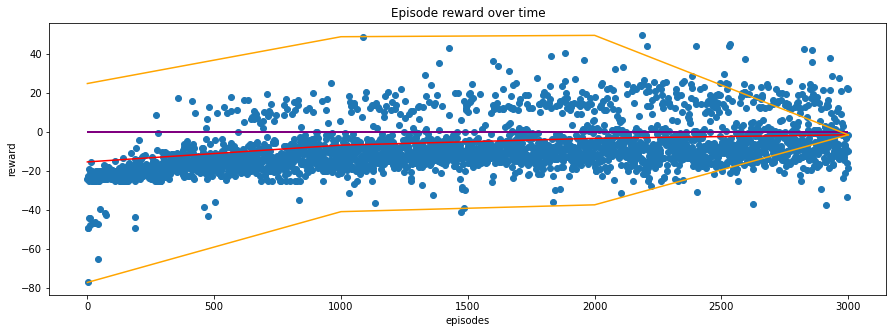

Maximum: 49.67960924200001
Average: -8.283078070103954

Values: -15.2 > -6.6 > -3.1 > -1.3

Minimum (last 1000): -77.0
Average (last 1000): -10.856346823073963
Maximum (last 1000): 49.018577006000015


In [121]:
plot(episode_reward, "Episode reward over time", "episodes", "reward")

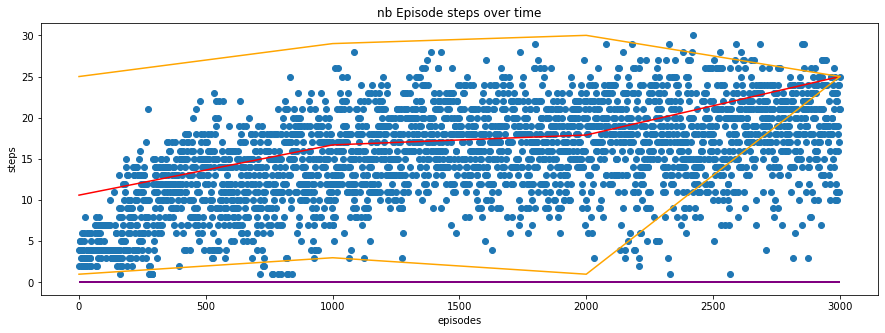

Maximum: 30
Average: 15.10063312229257

Values: 10.6 > 16.7 > 17.9 > 25

Minimum (last 1000): 1
Average (last 1000): 13.681159420289855
Maximum (last 1000): 29


In [122]:
plot(nb_episode_steps, "nb Episode steps over time", "episodes", "steps")

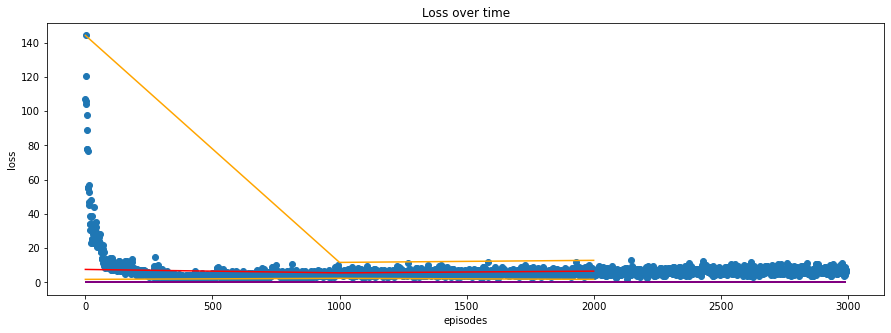

Maximum: 144.2140350341797
Average: 6.604015884455138

Values: 7.6 > 5.6 > 6.6

Minimum (last 1000): 1.811784267425537
Average (last 1000): 6.591668990261871
Maximum (last 1000): 144.2140350341797


In [123]:
plot(loss_filtered, "Loss over time", "episodes", "loss")

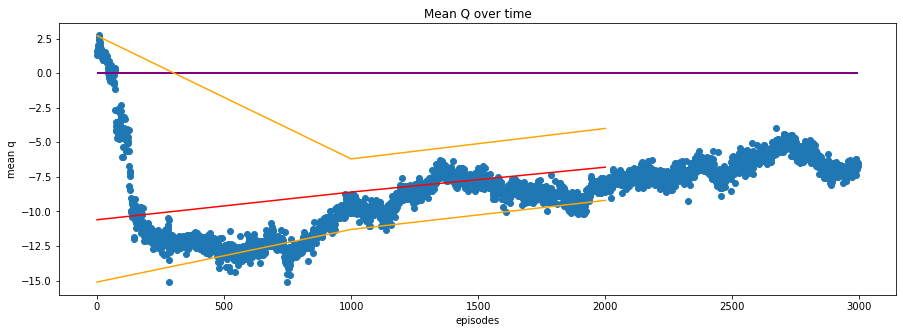

Maximum: 2.7289881706237793
Average: -8.678199521171237

Values: -10.6 > -8.6 > -6.8

Minimum (last 1000): -15.130903244018555
Average (last 1000): -9.622970577770317
Maximum (last 1000): 2.7289881706237793


In [124]:
plot(mean_q_filtered, "Mean Q over time", "episodes", "mean q")

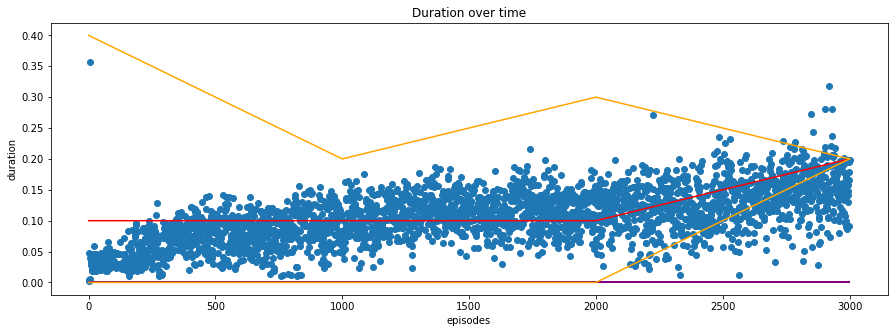

Maximum: 0.3574838000000007
Average: 0.10550447764078663

Values: 0.1 > 0.1 > 0.1 > 0.2

Minimum (last 1000): 0.002989999999999604
Average (last 1000): 0.09183032433783109
Maximum (last 1000): 0.3574838000000007


In [125]:
plot(duration, "Duration over time", "episodes", "duration")

In [30]:
import numpy as np

In [37]:
a = [-20.261387212, -19.036022205000002, -17.599954228, -15.0, -21.568566889, -25.0, -18.966970150999998, -19.499020959, -23.735088936, -19.836022205, -21.461387211999998, -16.399954228, -9.735852613, -21.640661745, -20.440661745, -13.305572809, -25.0, -21.335088936, -23.169403511, -25.0, -15.599954228, -20.166960021, -25.0, -20.308610936999997, -18.04717365, -15.599954228, -19.836022205, -18.966960021, -21.461387211999998, -25.0, -20.566960021, -18.141595014, -20.299020959, -17.834909213, -20.261387212, -23.735088936, -14.185740666000001, -15.17192059, -25.0, -19.474139698000002, -21.461387211999998, -17.102858406, -19.836022205, -20.261387212, -18.025319234999998, -15.893268426999999, -25.0, -16.799954228, -22.261387212, -18.499020959, -19.036022205000002, -25.0, -16.799954228, -20.699020959000002, -19.036022205000002, -19.036022205000002, -22.261387212, -22.261387212, -17.143201882, -25.0, -25.0, -18.141595014, -15.836022204999999, -20.261387212, 3.0335102180000035, -20.566960021, -20.261387212, -19.568566889]

In [38]:
b = [-24.6, -24.6, -24.6, -24.6, -25.0, -24.6, -24.6, -25.0, -24.6, -24.0, -24.6, -24.6, -24.0, -25.0, -24.6, -25.0, -24.6, -16.854033307999998, -24.0, -24.6, -24.6, -25.0, -0.5051025699999983, -24.6, -24.6, -24.6, -24.6, -24.6, -23.0, -24.6, -25.0, -24.6, -24.0, -25.0, -25.0, -24.6, -24.6, -25.0, -24.0, -24.6, -24.6, -24.6, -24.6, -25.0, -24.6, -23.0, -25.0, -24.6, -25.0, -25.0, -23.0, -24.0, -24.0, -25.0, -24.6, -25.0, -25.0, -24.6, -24.6, -25.0, -24.6, -24.6, -24.6, -24.0, -25.0, -25.0, -24.6, -25.0, -24.6, -25.0, -24.0, -23.0, -24.0, -24.6, -25.0, -25.0, -25.0, -24.0, -24.0, -25.0, -24.0, -24.6, -24.0, -24.6, -24.6, -23.0, -25.0, -24.0, -24.6, -25.0, -24.0, -25.0, -24.6, -25.0, -24.6, -24.6, -24.6, -24.0, -25.0, -25.0]

In [39]:
c = [24.6, 24.6, 24.6, 24.6, 25.0, 24.6, 24.6, 25.0, 24.6, 24.0, 24.6, 24.6, 24.0, 25.0, 24.6, 25.0, 24.6, 16.854033307999998, 24.0, 24.6, 24.6, 25.0, 0.5051025699999983, 24.6, 24.6, 24.6, 24.6, 24.6, 23.0, 24.6, 25.0, 24.6, 24.0, 25.0, 25.0, 24.6, 24.6, 25.0, 24.0, 24.6, 24.6, 24.6, 24.6, 25.0, 24.6, 23.0, 25.0, 24.6, 25.0, 25.0, 23.0, 24.0, 24.0, 25.0, 24.6, 25.0, 25.0, 24.6, 24.6, 25.0, 24.6, 24.6, 24.6, 24.0, 25.0, 25.0, 24.6, 25.0, 24.6, 25.0, 24.0, 23.0, 24.0, 24.6, 25.0, 25.0, 25.0, 24.0, 24.0, 25.0, 24.0, 24.6, 24.0, 24.6, 24.6, 23.0, 25.0, 24.0, 24.6, 25.0, 24.0, 25.0, 24.6, 25.0, 24.6, 24.6, 24.6, 24.0, 25.0, 25.0]

In [67]:
d = [10, -10, -10, -50, -30]

In [83]:
def _calculate_custom_metric(l: list):
        mean = np.mean(l)
    
        sm_list = [np.power(v - mean, 2) if v > 0 else -1 * np.power(v - mean, 2) for v in l]
        #sm_list = [np.power(v, 2) if v > 0 else -1 * np.power(v, 2) for v in l]
        return mean + np.mean(sm_list) if np.mean(sm_list) > 0 else mean - np.mean(sm_list) 

In [84]:
_calculate_custom_metric(a)

-16.570706821033184

In [85]:
_calculate_custom_metric(b)

-17.72083400240714

In [86]:
_calculate_custom_metric(c)

30.726348715152856

In [87]:
_calculate_custom_metric(d)

84.4